# <u>Terrestrial Ecosystem Conservation and Restoration Analysis Forecasting</u>


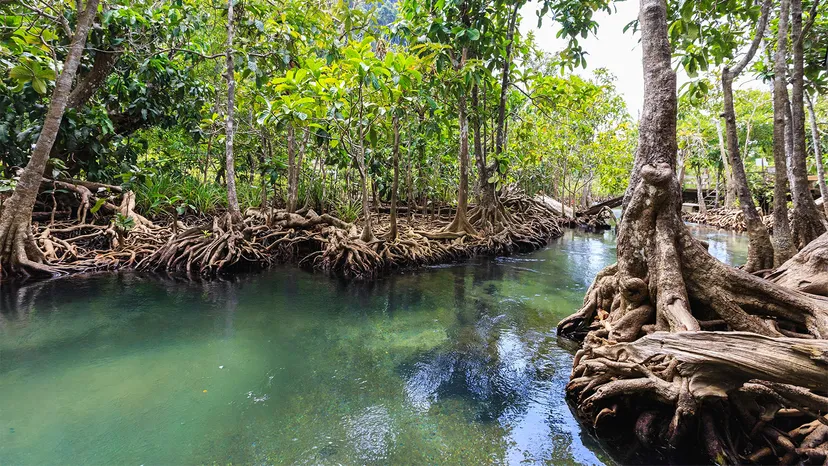

## <u>Business Understaning</u>


### Business Overview

Ecosystem Diversity Analysis project aims to analyze the biodiversity and ecological health of ecosystems using data and machine learning techniques. In today's world, maintaining ecosystem diversity is crucial for the planet's health and for sustaining life. Ecosystem diversity includes all the variety of ecosystems such as forests, oceans, wetlands, and grasslands, and the living organisms within them. By understanding the diversity of ecosystems, conservation efforts can be improved, policy decisions can be informed, and sustainable management practices can be adopted.


### Business Problem

Human activities like deforestation and climate change are driving unprecedented biodiversity loss, making effective conservation more urgent. Traditional, manual methods of monitoring ecosystems and biodiversity are slow and inefficient, hindering timely decision-making. The vast amount of environmental data—from research papers to reports—remains underutilized due to the difficulty of manual analysis. Automating this process using NLP, machine learning, and deep learning can enable faster, more accurate insights, empowering better decision-making for conservation, ecosystem restoration, and protected area monitoring.

### Objectives

1.	To develop an integrated analytical framework that combines Natural Language Processing (NLP) techniques and remote sensing indices (NDVI, NDWI, and BSI) for monitoring land cover changes, assessing ecosystem health, and providing actionable insights for conservation and sustainable land-use planning in protected areas.
2.	To analyze land cover changes using remote sensing indices such as NDVI, NDWI, and BSI to assess vegetation health, water availability, and soil exposure in protected areas.
3.	To apply Natural Language Processing (NLP) techniques to extract, categorize, and analyze conservation-related information from textual data, including research articles, policy documents, and environmental reports.
4.	To integrate geospatial analysis and NLP insights to develop a comprehensive framework for monitoring ecosystem health and supporting data-driven decision-making for conservation and sustainable land-use planning.


## <u>Data Understanding And Analysis</u>


Data sources;

1. IUCN Biodiversity data https://www.iucnredlist.org/resources
2. PROTECTED PLANET Protected area data WDPA_WDOECM_Feb2025_Public_KEN_csv https://www.protectedplanet.net/en/searchareassearch_term=KENYA&geo_type=sit
3. RCOE-ESA  PROJECT https://rcoe-geoportal.rcmrd.org/

### Data Analysis

The following libraries have been imported for the purpose of data manipulation, geospatial analysis, and machine learning. Each library is specialized in performing specific tasks, as outlined below:

1. **Fiona** : A library for reading and writing geographic data formats like shapefiles, GeoJSON, etc. It integrates with other geospatial libraries like geopandas.
2. **Shapefile** (pyshp): A library for reading and writing shapefiles, a common format for geospatial data.
3. **Geopandas**: Extends pandas to allow spatial operations on geospatial data, including shapefiles, GeoJSON, and other formats.
4. **Descartes**: Used for plotting geometries with matplotlib (necessary for visualizing geospatial data).
5. **Warnings**: To handle and suppress warnings during execution.


**NOTE**; _The first two datasets(Kenya_Biodiversity_Data.csv, Kenya_Biodiversity_Data.shp) are utilized for data exploration and analysis, with the primary objective of gaining a deeper understanding of the problem domain._

In [1]:
#importing necessary libraries
import pandas as pd
import fiona
import shapefile  #pyshp
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# reading the first csv file
data = pd.read_csv("Kenya_Biodiversity_Data.csv")
data.head()

,CONS_OBJ,DESIG,DESIG_ENG,DESIG_TYPE,FID,GIS_AREA,GIS_M_AREA,GOV_TYPE,INT_CRIT,ISO3,...,STATUS,STATUS_YR,SUB_LOC,SUPP_INFO,Shape__Are,Shape__Len,VERIF,WDPAID,WDPA_PID,geometry
0,Not Applicable,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,1,178.583580,0.0,Not Reported,(ii)(iii)(iv)(v)(vi),KEN,...,Designated,1990,KE-700,Not Applicable,1.785913e+08,53201.014297,State Verified,68092,68092,fiona.Geometry(coordinates=[[(4019990.60222995...
1,Not Applicable,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,2,289.588265,0.0,Not Reported,(i)(ii)(iii)(iv),KEN,...,Designated,1995,KE-700,Not Applicable,2.896367e+08,66514.653869,State Verified,103549,103549,fiona.Geometry(coordinates=[[(4053515.58007725...
2,Not Applicable,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,3,84.605382,0.0,Not Reported,(i)(ii)(iv)(v),KEN,...,Designated,2001,KE-700,Not Applicable,8.460683e+07,47112.573728,State Verified,900591,900591,fiona.Geometry(coordinates=[[(4026414.85004363...
3,Not Applicable,Community Nature Reserve,Community Nature Reserve,National,4,211.084136,0.0,Indigenous peoples,Not Applicable,KEN,...,Not Reported,2010,Not Reported,Not Applicable,2.112809e+08,80285.260186,Not Reported,555566888,555566888,fiona.Geometry(coordinates=[[(4567568.06049632...
4,Not Applicable,Community Nature Reserve,Community Nature Reserve,National,5,3812.709416,0.0,Indigenous peoples,Not Applicable,KEN,...,Not Reported,2007,Not Reported,Not Applicable,3.814237e+09,307500.071522,Not Reported,555555520,555555520,fiona.Geometry(coordinates=[[(4262008.17016334...


In [3]:
# checking the properties of the csv file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CONS_OBJ    123 non-null    object 
 1   DESIG       123 non-null    object 
 2   DESIG_ENG   123 non-null    object 
 3   DESIG_TYPE  123 non-null    object 
 4   FID         123 non-null    int64  
 5   GIS_AREA    123 non-null    float64
 6   GIS_M_AREA  123 non-null    float64
 7   GOV_TYPE    123 non-null    object 
 8   INT_CRIT    123 non-null    object 
 9   ISO3        123 non-null    object 
 10  IUCN_CAT    123 non-null    object 
 11  MANG_AUTH   123 non-null    object 
 12  MANG_PLAN   123 non-null    object 
 13  MARINE      123 non-null    int64  
 14  METADATAID  123 non-null    int64  
 15  NAME        123 non-null    object 
 16  NO_TAKE     123 non-null    object 
 17  NO_TK_AREA  123 non-null    int64  
 18  OBJECTID    123 non-null    int64  
 19  ORIG_NAME   123 non-null    o

In [4]:
data.describe()

,FID,GIS_AREA,GIS_M_AREA,MARINE,METADATAID,NO_TK_AREA,OBJECTID,PA_DEF,REP_AREA,REP_M_AREA,STATUS_YR,Shape__Are,Shape__Len,WDPAID
count,123.000000,123.000000,123.000000,123.0,123.000000,123.0,123.000000,123.0,123.000000,123.0,123.000000,1.230000e+02,123.000000,1.230000e+02
mean,62.000000,697.004663,0.204041,0.0,1334.926829,0.0,1530.097561,1.0,695.318684,0.0,1958.975610,7.005332e+08,112184.006606,3.026439e+08
std,35.651087,1561.892228,1.514479,0.0,414.063335,0.0,1261.779724,0.0,1536.813069,0.0,253.471422,1.573227e+09,109948.952703,2.777892e+08
min,1.000000,0.280749,0.000000,0.0,933.000000,0.0,164.000000,1.0,0.000000,0.0,0.000000,2.826419e+05,2600.160674,7.520000e+02
25%,31.500000,68.169569,0.000000,0.0,933.000000,0.0,322.500000,1.0,68.130000,0.0,1976.000000,6.864380e+07,45557.354134,2.595500e+03
50%,62.000000,186.822227,0.000000,0.0,946.000000,0.0,461.000000,1.0,192.510000,0.0,1995.000000,1.868473e+08,78109.157206,5.555555e+08
75%,92.500000,638.612882,0.000000,0.0,1775.000000,0.0,2702.500000,1.0,677.800000,0.0,2006.000000,6.429538e+08,146109.629842,5.555555e+08
max,123.000000,13380.526764,14.947720,0.0,1934.000000,0.0,4170.000000,1.0,11747.000000,0.0,2020.000000,1.350259e+10,655780.325866,5.557058e+08


In [5]:
# Check for missing data
data.isnull().sum()


CONS_OBJ      0
DESIG         0
DESIG_ENG     0
DESIG_TYPE    0
FID           0
GIS_AREA      0
GIS_M_AREA    0
GOV_TYPE      0
INT_CRIT      0
ISO3          0
IUCN_CAT      0
MANG_AUTH     0
MANG_PLAN     0
MARINE        0
METADATAID    0
NAME          0
NO_TAKE       0
NO_TK_AREA    0
OBJECTID      0
ORIG_NAME     0
OWN_TYPE      0
PARENT_ISO    0
PA_DEF        0
REP_AREA      0
REP_M_AREA    0
STATUS        0
STATUS_YR     0
SUB_LOC       0
SUPP_INFO     0
Shape__Are    0
Shape__Len    0
VERIF         0
WDPAID        0
WDPA_PID      0
geometry      0
dtype: int64

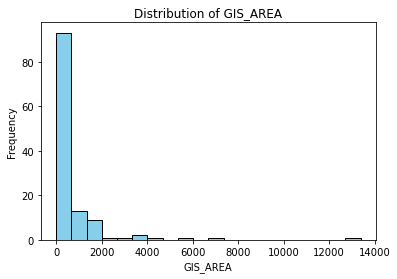

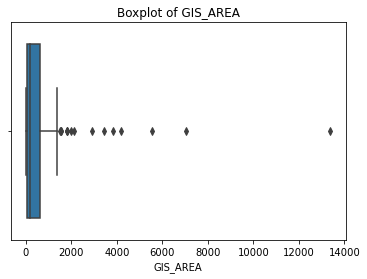

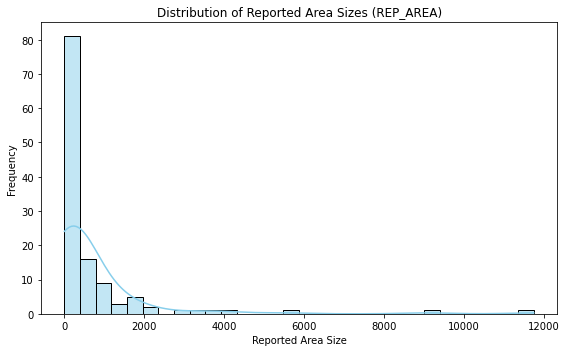

In [28]:
# Histogram of GIS_AREA
data['GIS_AREA'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of GIS_AREA')
plt.xlabel('GIS_AREA')
plt.show()

# Boxplot for a numerical column (e.g., GIS_AREA)
sns.boxplot(x=data['GIS_AREA'])
plt.title('Boxplot of GIS_AREA')
plt.show()

# Plot the distribution of REP_AREA
plt.figure(figsize=(8, 5))
sns.histplot(data['REP_AREA'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Reported Area Sizes (REP_AREA)")
plt.xlabel("Reported Area Size")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



**GIS_AREA** typically refers to the geographic area of a feature (such as a protected area, reserve, or site) based on spatial data. This data is usually captured from maps, satellite images, or other geospatial data sources, and the area is calculated using the coordinates and geometry of the feature in a GIS system.
**REP_AREA** often represents the area data that has been reported in official records, surveys, or documents. 

Let's start by creating a bar chart that shows the distribution of protected area statuses. This will help us understand how many areas fall into each STATUS category.

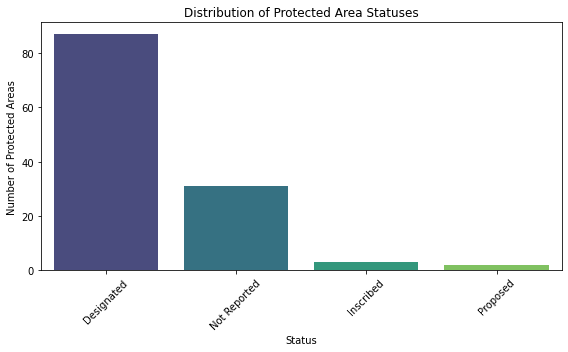

In [7]:
# Counting the occurrences of each STATUS
status_counts = data['STATUS'].value_counts()

# Plot the distribution of protected area statuses
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
plt.title("Distribution of Protected Area Statuses")
plt.xlabel("Status")
plt.ylabel("Number of Protected Areas")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


Since we will be dealing with terrestrial data, its necessary to drop the marine column.

In [8]:
# dropping the marine column

data = data.drop(columns=['MARINE', 'FID', 'OBJECTID'])

# Verify the column has been removed
print(data.columns)


Index(['CONS_OBJ', 'DESIG', 'DESIG_ENG', 'DESIG_TYPE', 'GIS_AREA',
       'GIS_M_AREA', 'GOV_TYPE', 'INT_CRIT', 'ISO3', 'IUCN_CAT', 'MANG_AUTH',
       'MANG_PLAN', 'METADATAID', 'NAME', 'NO_TAKE', 'NO_TK_AREA', 'ORIG_NAME',
       'OWN_TYPE', 'PARENT_ISO', 'PA_DEF', 'REP_AREA', 'REP_M_AREA', 'STATUS',
       'STATUS_YR', 'SUB_LOC', 'SUPP_INFO', 'Shape__Are', 'Shape__Len',
       'VERIF', 'WDPAID', 'WDPA_PID', 'geometry'],
      dtype='object')


The IUCN categories classify protected areas based on their level of protection, from strict nature reserves to areas with sustainable use of natural resources. Visualizing this helps reveal how well terrestrial areas are managed.

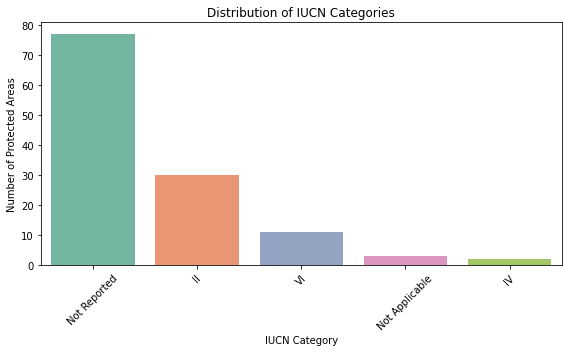

In [9]:
# Count occurrences of each IUCN category
iucn_counts = data['IUCN_CAT'].value_counts()

# Plot the distribution of IUCN categories
plt.figure(figsize=(8, 5))
sns.barplot(x=iucn_counts.index, y=iucn_counts.values, palette="Set2")
plt.title("Distribution of IUCN Categories")
plt.xlabel("IUCN Category")
plt.ylabel("Number of Protected Areas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Read the shapefile
# Display the first few rows
protected_areas = gpd.read_file(r"C:\Users\user\OneDrive\Projects\Biodiversity-conservation\Kenya_Biodiversity_Data.shp")

protected_areas.head()

,FID,OBJECTID,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,...,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,Shape__Are,Shape__Len,geometry
0,1,164,68092,68092,1,Lake Nakuru,Lake Nakuru,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,...,State Verified,1856,KE-700,KEN,KEN,Not Applicable,Not Applicable,1.785913e+08,53201.014297,"POLYGON ((4019990.602 -53301.506, 4016589.792 ..."
1,2,239,103549,103549,1,Lake Naivasha,Lake Naivasha,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,...,State Verified,1856,KE-700,KEN,KEN,Not Applicable,Not Applicable,2.896367e+08,66514.653869,"POLYGON ((4053515.580 -89614.025, 4049531.456 ..."
2,3,292,900591,900591,1,Lake Bogoria,Lake Bogoria,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,...,State Verified,1856,KE-700,KEN,KEN,Not Applicable,Not Applicable,8.460683e+07,47112.573728,"POLYGON ((4026414.850 17559.559, 4026107.608 1..."
3,4,293,555566888,555566888,1,Awer Community Conservancy,Awer Community Conservancy,Community Nature Reserve,Community Nature Reserve,National,...,Not Reported,1775,Not Reported,KEN,KEN,Not Applicable,Not Applicable,2.112809e+08,80285.260186,"POLYGON ((4567568.060 -195834.511, 4579221.987..."
4,5,294,555555520,555555520,1,Biliqo-Bulesa Community Conservancy,Biliqo-Bulesa Community Conservancy,Community Nature Reserve,Community Nature Reserve,National,...,Not Reported,1775,Not Reported,KEN,KEN,Not Applicable,Not Applicable,3.814237e+09,307500.071522,"POLYGON ((4262008.170 161893.150, 4262345.805 ..."


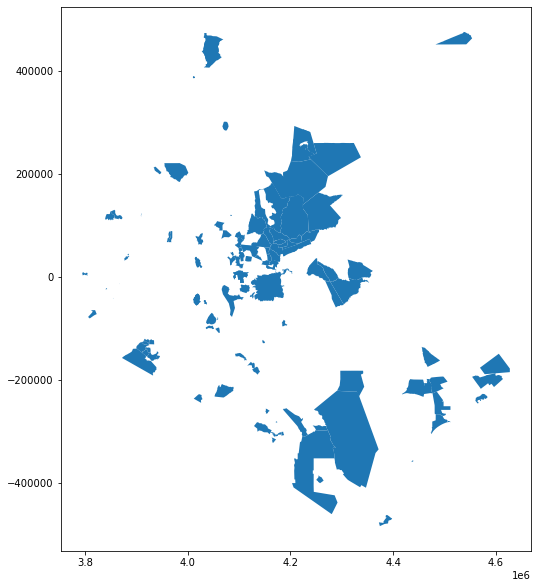

In [11]:
#Display the protected areas
protected_areas.plot(figsize=(10, 10))
plt.show()

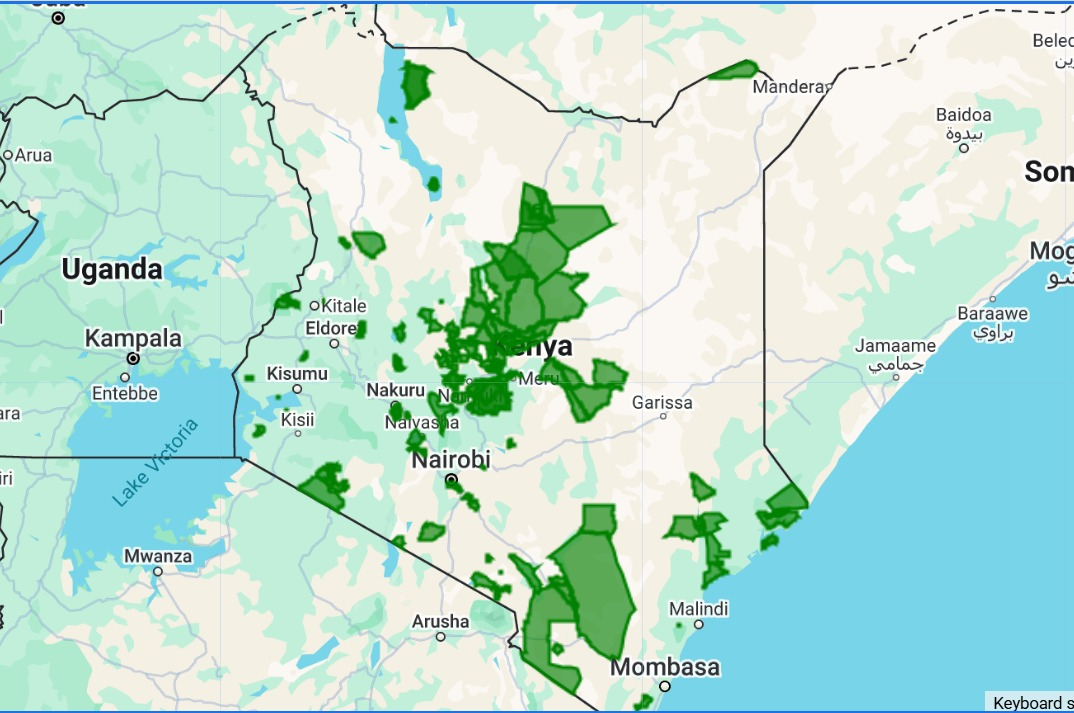

In [12]:
# List available columns
print(protected_areas.columns)  
# Show geometry column
print(protected_areas.geometry.head())  


Index(['FID', 'OBJECTID', 'WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME',
       'DESIG', 'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')
0    POLYGON ((4019990.602 -53301.506, 4016589.792 ...
1    POLYGON ((4053515.580 -89614.025, 4049531.456 ...
2    POLYGON ((4026414.850 17559.559, 4026107.608 1...
3    POLYGON ((4567568.060 -195834.511, 4579221.987...
4    POLYGON ((4262008.170 161893.150, 4262345.805 ...
Name: geometry, dtype: geometry


In [13]:
#dropping irrelevant columns
protected_areas = protected_areas.drop(columns=['MARINE', 'FID', 'OBJECTID'])


In [14]:
# extracting coordinates of the protected areas
protected_areas["centroid"] = protected_areas.geometry.centroid
protected_areas["longitude"] = protected_areas["centroid"].x
protected_areas["latitude"] = protected_areas["centroid"].y

print(protected_areas[["longitude", "latitude"]].head())

      longitude       latitude
0  4.017565e+06  -44438.812120
1  4.046111e+06  -82877.579188
2  4.022787e+06   26873.917623
3  4.583420e+06 -194495.383203
4  4.260562e+06  126072.562670


<Figure size 1440x1080 with 0 Axes>

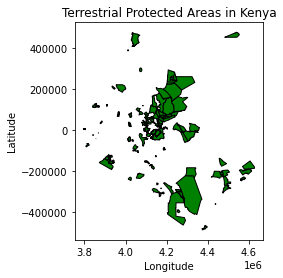

In [15]:
# Load the shapefile with the correct variable name
protected_areas = r"C:\Users\user\OneDrive\Projects\Biodiversity-conservation\Kenya_Biodiversity_Data.shp" # Using raw string to avoid path issues
datashp = gpd.read_file(protected_areas)

# Basic plot of the shapefile
plt.figure(figsize=(20, 15))
datashp.plot(color='green', edgecolor='black')
plt.title("Terrestrial Protected Areas in Kenya")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [16]:
datashp.columns

Index(['FID', 'OBJECTID', 'WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME',
       'DESIG', 'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')

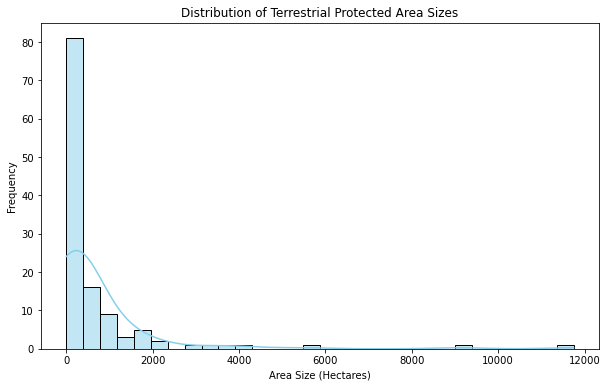

In [17]:
# Replace 'AREA_HA' with the actual name of the area size column
area_column = 'REP_AREA'  # Update this after checking

# Plotting the distribution of area sizes
plt.figure(figsize=(10, 6))
sns.histplot(datashp[area_column], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Terrestrial Protected Area Sizes")
plt.xlabel("Area Size (Hectares)")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Replace 'AREA_HA' with the actual area size column
area_column = 'REP_AREA'

# Largest protected area
largest_area = datashp.nlargest(1, area_column)
print("Largest Protected Area:\n", largest_area)

# Smallest protected area
smallest_area = datashp.nsmallest(1, area_column)
print("Smallest Protected Area:\n", smallest_area)


Largest Protected Area:
      FID  OBJECTID  WDPAID WDPA_PID PA_DEF        NAME   ORIG_NAME  \
113  114      2727     752      752      1  Tsavo East  Tsavo East   

             DESIG      DESIG_ENG DESIG_TYPE  ...           VERIF METADATAID  \
113  National Park  National Park   National  ...  State Verified        933   

          SUB_LOC  PARENT_ISO  ISO3       SUPP_INFO        CONS_OBJ  \
113  Not Reported         KEN   KEN  Not Applicable  Not Applicable   

       Shape__Are     Shape__Len  \
113  1.350259e+10  525611.548436   

                                              geometry  
113  POLYGON ((4285588.812 -352978.762, 4285537.519...  

[1 rows x 35 columns]
Smallest Protected Area:
     FID  OBJECTID     WDPAID   WDPA_PID PA_DEF     NAME ORIG_NAME  \
31   32       323  555566897  555566897      1  Ngorare   Ngorare   

                     DESIG               DESIG_ENG DESIG_TYPE  ...  \
31  Private Protected Area  Private Protected Area   National  ...   

           VER

In [19]:
# Summary statistics for area size
area_stats = datashp[area_column].describe()
print("Area Size Summary Statistics:\n", area_stats)

Area Size Summary Statistics:
 count      123.000000
mean       695.318684
std       1536.813069
min          0.000000
25%         68.130000
50%        192.510000
75%        677.800000
max      11747.000000
Name: REP_AREA, dtype: float64


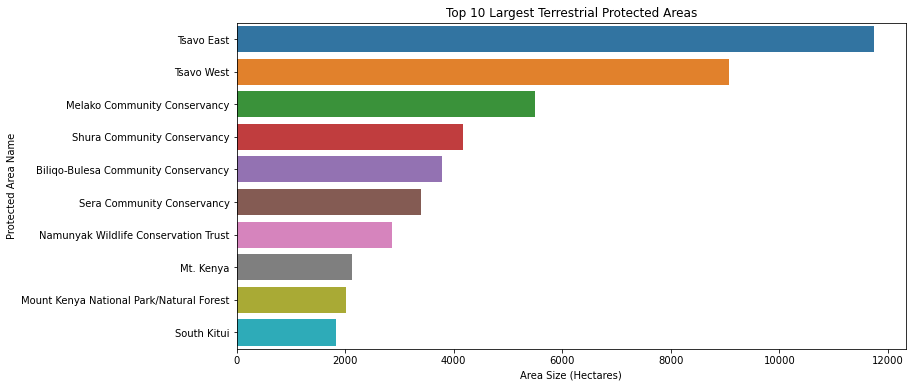

In [20]:
# Top 10 largest protected areas
top_10 = datashp.nlargest(10, area_column)

# Plotting the top 10 largest areas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10[area_column], y=top_10['NAME'])  # Replace 'NAME' with the actual name column if different
plt.title("Top 10 Largest Terrestrial Protected Areas")
plt.xlabel("Area Size (Hectares)")
plt.ylabel("Protected Area Name")
plt.show()

In [21]:
# Check column names and unique values to identify the category column
print(datashp.columns)

# Replace 'CATEGORY' with the actual name of the category column
print(datashp['DESIG'].unique())


Index(['FID', 'OBJECTID', 'WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME',
       'DESIG', 'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')
['Ramsar Site, Wetland of International Importance'
 'Community Nature Reserve' 'Community Conservancy'
 'Private Nature Reserve' 'Private Protected Area' 'Private Ranch'
 'Wildlife Sanctuary' 'Group Ranch'
 'World Heritage Site (natural or mixed)' 'National Sanctuary'
 'National Park' 'National Reserve' 'Conservancy']


In [22]:
# Replace 'CATEGORY' with the actual column name
category_counts = datashp['DESIG'].value_counts()
print("Protected Areas by Category:\n", category_counts)

Protected Areas by Category:
 National Reserve                                    29
Community Nature Reserve                            27
National Park                                       24
Community Conservancy                               21
National Sanctuary                                   5
Private Ranch                                        4
Ramsar Site, Wetland of International Importance     3
World Heritage Site (natural or mixed)               3
Conservancy                                          2
Private Protected Area                               2
Private Nature Reserve                               1
Wildlife Sanctuary                                   1
Group Ranch                                          1
Name: DESIG, dtype: int64


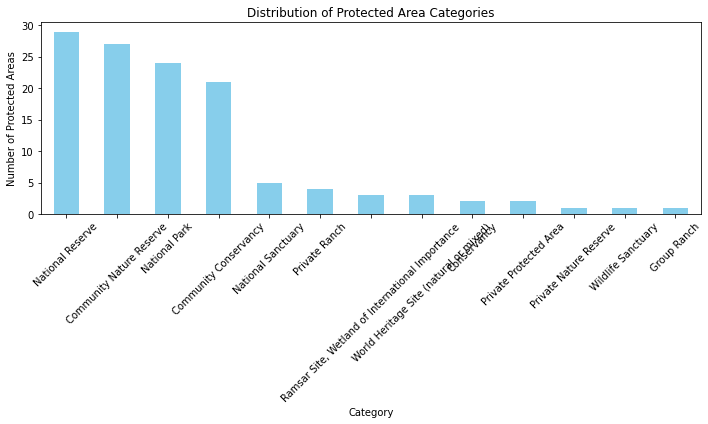

In [23]:
# Bar chart for category distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Protected Area Categories")
plt.xlabel("Category")
plt.ylabel("Number of Protected Areas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

let's analyze Protected Areas by Year of Establishment. This will help us understand how conservation efforts have evolved over time—like spotting periods of increased protection activity.

In [24]:
# Check column names and look for year-related data
print(datashp.columns)

# Preview unique values (Replace 'YEAR_EST' with the actual year column name if different)
print(datashp['STATUS_YR'].unique())

Index(['FID', 'OBJECTID', 'WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME',
       'DESIG', 'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')
[1990 1995 2001 2010 2007 2011 2013 2002 2000 1999 2006 2004 1985 1989
    0 1992 1983 2009 1973 2008 1969 1970 2005 1997 1950 1974 1979 1976
 1984 1991 1968 1988 1966 1986 1967 1948 1943 1946 2020]


In [25]:
# Replace 'YEAR_EST' with the correct column name
yearly_counts = datashp['STATUS_YR'].value_counts().sort_index()
print("Number of Protected Areas Established Each Year:\n", yearly_counts)

Number of Protected Areas Established Each Year:
 0        2
1943     1
1946     1
1948     2
1950     1
1966     1
1967     2
1968     4
1969     1
1970     3
1973     2
1974     5
1976     7
1979     5
1983     8
1984     1
1985     4
1986     1
1988     1
1989     3
1990     3
1991     1
1992     2
1995     5
1997     2
1999     2
2000     8
2001     3
2002     2
2004     4
2005     1
2006     5
2007     4
2008     1
2009     2
2010    14
2011     3
2013     3
2020     3
Name: STATUS_YR, dtype: int64


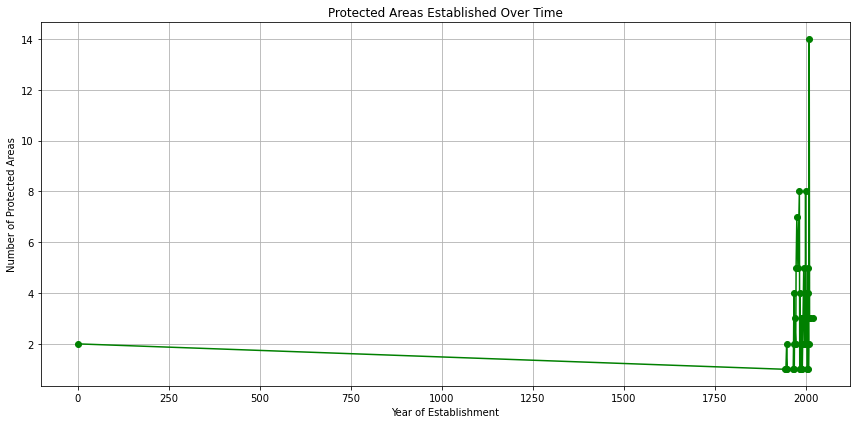

In [26]:
# Line plot for establishment trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='green')
plt.title("Protected Areas Established Over Time")
plt.xlabel("Year of Establishment")
plt.ylabel("Number of Protected Areas")
plt.grid(True)
plt.tight_layout()
plt.show()

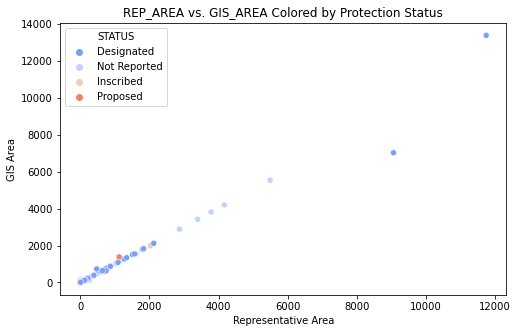

In [27]:
# features relation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=datashp, x='REP_AREA', y='GIS_AREA', hue='STATUS', palette='coolwarm')
plt.title("REP_AREA vs. GIS_AREA Colored by Protection Status")
plt.xlabel("Representative Area")
plt.ylabel("GIS Area")
plt.show()

# Extracting Indices for Ecosystem Analysis in Google Earth Engine (GEE)

1. Introduction

Ecosystem analysis using remote sensing relies on spectral indices to assess vegetation health, water presence, and bare soil extent. In Google Earth Engine (GEE), key indices include:

Normalized Difference Vegetation Index (NDVI) – Measures vegetation health.

Normalized Difference Water Index (NDWI) – Detects water bodies.

Bare Soil Index (BSI) – Identifies bare soil areas.

This documentation provides a workflow for extracting these indices in GEE for protected areas.

2. Why Sentinel-2?

Sentinel-2 is chosen for ecosystem analysis due to its high spatial resolution (10-20m), frequent revisit time (every 5 days), and availability of key spectral bands required for vegetation, water, and soil analysis. Its free and open-access data makes it ideal for monitoring environmental changes over time.



 3. Sentinel-2 Bands Used

Sentinel-2 provides 13 spectral bands, but for ecosystem analysis, we primarily use:

B2 (Blue, 490nm) – Sensitive to water and atmospheric conditions.

B3 (Green, 560nm) – Useful for vegetation and water body analysis.

B4 (Red, 665nm) – Used in NDVI to detect vegetation health.

B8 (Near-Infrared, 842nm) – Highly reflective for healthy vegetation.

B11 (Shortwave Infrared-1, 1610nm) – Helps in soil moisture and bare soil detection.

These bands enable accurate vegetation, water, and land surface analysis.

 4. Setting Up GEE Environment

Before running the analysis, ensure you have a Google Earth Engine account and access the JavaScript code editor at https://code.earthengine.google.com

In [5]:
!pip install earthengine-api
!earthengine authenticate
!pip3 install opencv-python
!pip install rasterio
!pip install earthengine-api geemap
import warnings
warnings.filterwarnings('ignore')

Authenticate: Credentials already exist.  Use --force to refresh.


In [6]:
import ee
import geemap

# Authenticate Google Earth Engine 
ee.Authenticate()

# Initialize the Earth Engine API
ee.Initialize()

In [9]:
# Downloading sentinel 2 image from Google earth platform
# image preprocesing by removing clouds
import warnings
warnings.filterwarnings('ignore')
# Initialize the Earth Engine API
ee.Initialize()
import ee

# Define your Area of Interest (AOI)
aoi = ee.Geometry.Rectangle([34.5, -1.0, 35.5, 0.0])  # Example: Kenya region

# Load Sentinel-2 Image Collection
sentinel2 = ee.ImageCollection("COPERNICUS/S2") \
    .filterBounds(aoi) \
    .filterDate("2020-01-31") \
    .sort("CLOUDY_PIXEL_PERCENTAGE: 10%") \ # reducing cloud cover
    .first()  # Select the least cloudy image

# Select bands (RGB + Infrared for vegetation analysis)
bands = ["B4", "B3", "B2", "B8"]  # Red, Green, Blue, NIR
sentinel2 = sentinel2.select(bands)

# Export the image
task = ee.batch.Export.image.toDrive(
    image=sentinel2,
    description="Sentinel2_Biodiversity",
    folder="EarthEngine",
    fileNamePrefix="sentinel3_image",
    region=aoi,
    scale=10,
    maxPixels=1e13
)

task.start()
print("Download")

Download


In [40]:
# Check the status of all running tasks
tasks = ee.batch.Task.list()
for task in tasks:
    print(task.status())


{'state': 'FAILED', 'description': 'Sentinel2_Biodiversity', 'priority': 100, 'creation_timestamp_ms': 1740576991348, 'update_timestamp_ms': 1740577000723, 'start_timestamp_ms': 1740577000177, 'task_type': 'EXPORT_IMAGE', 'attempt': 1, 'error_message': "Image.select: Parameter 'input' is required and may not be null.", 'id': '6UV5V7DHJ2LDBYSPKFE4LEXV', 'name': 'projects/earthengine-legacy/operations/6UV5V7DHJ2LDBYSPKFE4LEXV'}
{'state': 'FAILED', 'description': 'Sentinel2_Biodiversity', 'priority': 100, 'creation_timestamp_ms': 1740576920681, 'update_timestamp_ms': 1740576936336, 'start_timestamp_ms': 1740576935805, 'task_type': 'EXPORT_IMAGE', 'attempt': 1, 'error_message': "Image.select: Parameter 'input' is required and may not be null.", 'id': 'B72V6BMQNZC35Q6VUGYKEXNN', 'name': 'projects/earthengine-legacy/operations/B72V6BMQNZC35Q6VUGYKEXNN'}
{'state': 'FAILED', 'description': 'Sentinel2_Biodiversity', 'priority': 100, 'creation_timestamp_ms': 1740576780700, 'update_timestamp_ms':

{'state': 'FAILED', 'description': 'Full_BSI_TimeSeries', 'priority': 100, 'creation_timestamp_ms': 1740238585226, 'update_timestamp_ms': 1740238600808, 'start_timestamp_ms': 1740238588464, 'task_type': 'EXPORT_FEATURES', 'attempt': 1, 'batch_eecu_usage_seconds': 2.5332794180000002, 'error_message': "Error in map(ID=9):\nDictionary.get: Dictionary does not contain key: 'BSI'.", 'id': 'PNEKWRG756KCA4DPAXNAYKPH', 'name': 'projects/earthengine-legacy/operations/PNEKWRG756KCA4DPAXNAYKPH'}
{'state': 'FAILED', 'description': 'Full_BSI_TimeSeries', 'priority': 100, 'creation_timestamp_ms': 1740238495345, 'update_timestamp_ms': 1740238508194, 'start_timestamp_ms': 1740238501771, 'task_type': 'EXPORT_FEATURES', 'attempt': 1, 'batch_eecu_usage_seconds': 3.053685903, 'error_message': "Error in map(ID=9):\nDictionary.get: Dictionary does not contain key: 'BSI'.", 'id': 'L4LSSGVCDPKZ4CG5QBDXGZIH', 'name': 'projects/earthengine-legacy/operations/L4LSSGVCDPKZ4CG5QBDXGZIH'}
{'state': 'COMPLETED', 'des

{'state': 'FAILED', 'description': 'SEGERA_NDVI_2020', 'priority': 100, 'creation_timestamp_ms': 1740202577971, 'update_timestamp_ms': 1740202581931, 'start_timestamp_ms': 1740202581114, 'task_type': 'EXPORT_IMAGE', 'attempt': 1, 'error_message': "Image.setDefaultProjection, argument 'image': Invalid type.\nExpected type: Image<unknown bands>.\nActual type: ImageCollection.", 'id': '4UWUG7LB2EIUOT52L44ULKP3', 'name': 'projects/earthengine-legacy/operations/4UWUG7LB2EIUOT52L44ULKP3'}
{'state': 'FAILED', 'description': 'SEGERA_NDVI_2020', 'priority': 100, 'creation_timestamp_ms': 1740166740558, 'update_timestamp_ms': 1740166751053, 'start_timestamp_ms': 1740166750538, 'task_type': 'EXPORT_IMAGE', 'attempt': 1, 'error_message': "Image.setDefaultProjection, argument 'image': Invalid type.\nExpected type: Image<unknown bands>.\nActual type: ImageCollection.", 'id': '5NTMCU6MF5DOJXMYV5BV6NOB', 'name': 'projects/earthengine-legacy/operations/5NTMCU6MF5DOJXMYV5BV6NOB'}
{'state': 'FAILED', 'des

{'state': 'FAILED', 'description': 'Biodiversity_change', 'priority': 100, 'creation_timestamp_ms': 1739876235445, 'update_timestamp_ms': 1739876296529, 'start_timestamp_ms': 1739876246139, 'task_type': 'EXPORT_IMAGE', 'attempt': 1, 'error_message': "reduce.median: Error in map(ID=20150811T080950_20160507T135300_T36MXD):\nImage.select: Band pattern 'B2, B3, B4' did not match any bands. Available bands: [B1, B2, B3, B4, B5, B6, B7, B8, B8A, B9, B10, B11, B12, QA10, QA20, QA60]", 'id': 'GXSUVYXETH7PETWVG2J3NGSI', 'name': 'projects/earthengine-legacy/operations/GXSUVYXETH7PETWVG2J3NGSI'}
{'state': 'FAILED', 'description': 'Biodiversity_change', 'priority': 100, 'creation_timestamp_ms': 1739876037390, 'update_timestamp_ms': 1739876165213, 'start_timestamp_ms': 1739876040969, 'task_type': 'EXPORT_IMAGE', 'attempt': 1, 'error_message': "reduce.median: Error in map(ID=20150811T080950_20160507T135300_T36MZE):\nImage.select: Band pattern 'B2, B3, B4' did not match any bands. Available bands: [B

{'state': 'FAILED', 'description': 'Clipped_Sentinel_Image', 'priority': 100, 'creation_timestamp_ms': 1739817299517, 'update_timestamp_ms': 1739817310035, 'start_timestamp_ms': 1739817305668, 'task_type': 'EXPORT_IMAGE', 'attempt': 1, 'error_message': 'Export too large: specified 402780024 pixels (max: 100000000). Specify higher maxPixels value if you intend to export a large area.', 'id': 'YQQZXQLUIDRNX5KJWF2CNL7M', 'name': 'projects/earthengine-legacy/operations/YQQZXQLUIDRNX5KJWF2CNL7M'}
{'state': 'FAILED', 'description': 'Ingest table: "projects/ee-aurelephie4/assets/tsavo"', 'creation_timestamp_ms': 1739816887501, 'update_timestamp_ms': 1739816891595, 'start_timestamp_ms': 1739816891338, 'task_type': 'INGEST_TABLE', 'attempt': 1, 'error_message': "Cannot overwrite asset 'projects/ee-aurelephie4/assets/tsavo'.", 'id': 'RDM3ZEBCY6EQV6BFH3HJXYJR', 'name': 'projects/earthengine-legacy/operations/RDM3ZEBCY6EQV6BFH3HJXYJR'}
{'state': 'COMPLETED', 'description': 'Ingest table: "projects

5. Calculating Spectral Indices


### **i. NDWI (Normalized Difference Water Index)**
\[
NDWI = {NIR - SWIR}/{NIR + SWIR}
\]

In [28]:
import pandas as pd

ndwi = pd.read_csv(r"C:\Users\user\Downloads\NDWI_Stats_2019_2025 (1).csv")
ndwi.tail()

,system:index,Max_NDWI,Mean_NDWI,Min_NDWI,Year,.geo
2,2,-0.016030,-0.371337,-0.710014,2021,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,3,0.021453,-0.206131,-0.440554,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,4,-0.015497,-0.225380,-0.459494,2023,"{""type"":""MultiPoint"",""coordinates"":[]}"
5,5,0.056345,-0.312895,-0.514645,2024,"{""type"":""MultiPoint"",""coordinates"":[]}"
6,6,0.069066,-0.243648,-0.501834,2025,"{""type"":""MultiPoint"",""coordinates"":[]}"


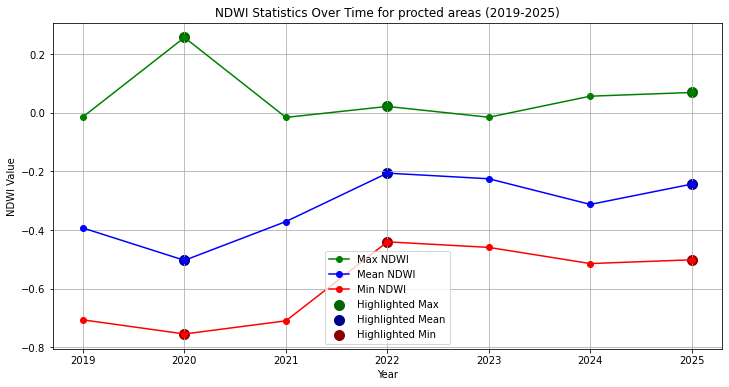

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\user\Downloads\NDWI_Stats_2019_2025 (1).csv"
ndwi_data = pd.read_csv(file_path)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot Max, Mean, and Min NDWI over the years
plt.plot(ndwi_data['Year'], ndwi_data['Max_NDWI'], marker='o', label='Max NDWI', color='green')
plt.plot(ndwi_data['Year'], ndwi_data['Mean_NDWI'], marker='o', label='Mean NDWI', color='blue')
plt.plot(ndwi_data['Year'], ndwi_data['Min_NDWI'], marker='o', label='Min NDWI', color='red')

# Highlight specific years (e.g., 2020, 2022, 2025)
highlight_years = [2020, 2022, 2025]
highlight_data = ndwi_data[ndwi_data['Year'].isin(highlight_years)]

# Mark the highlighted points correctly
plt.scatter(highlight_data['Year'], highlight_data['Max_NDWI'], color='darkgreen', s=100, label='Highlighted Max')
plt.scatter(highlight_data['Year'], highlight_data['Mean_NDWI'], color='darkblue', s=100, label='Highlighted Mean')
plt.scatter(highlight_data['Year'], highlight_data['Min_NDWI'], color='darkred', s=100, label='Highlighted Min')

# Adding titles and labels
plt.title('NDWI Statistics Over Time for procted areas (2019-2025)')
plt.xlabel('Year')
plt.ylabel('NDWI Value')
plt.legend()
plt.grid(True)

# Ensuring all years are shown on the x-axis
plt.xticks(ndwi_data['Year'])

# Display the plot
plt.show()


NDVI is calculated using the formula:
### **ii. NDVI (Normalized Difference Vegetation Index)**
\[
NDVI = {NIR - RED}/{NIR + RED}
\]

In [ ]:
NDVI is calculated using the formula

  system:time_start  undefined
0      Dec 15, 2018      0.542
1      Dec 25, 2018      0.079
2      Dec 30, 2018      0.370
3       Jan 4, 2019      0.008
4       Jan 9, 2019      0.294


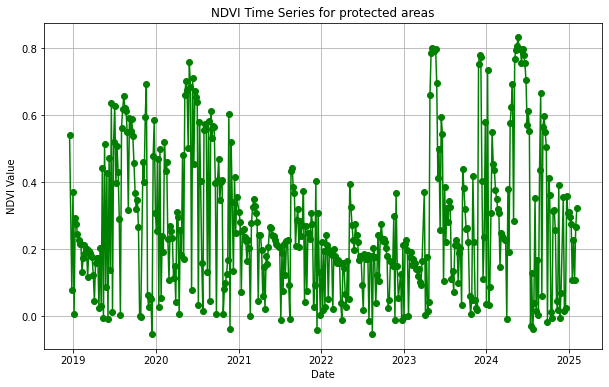

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the NDVI data
ndvi = pd.read_csv(r"C:\Users\user\Downloads\ndvi 1.csv")

# Check the first few rows to understand the structure
print(ndvi.head())

# Convert the date column to datetime format (if needed)
ndvi['system:time_start'] = pd.to_datetime(ndvi['system:time_start'])

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(ndvi['system:time_start'], ndvi['undefined'], marker='o', linestyle='-', color='green')
plt.title('NDVI Time Series for protected areas')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.show()


### **iii. BSI (Bare Soil Index)**
\[
BSI = {(SWIR + RED) - (NIR + BLUE)}/{(SWIR + RED) + (NIR + BLUE)}
\]

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
file_path = r"C:\Users\user\Downloads\bsi.csv"
bsi_data = pd.read_csv(file_path)
bsi_data.head()

,year,min_BSI,max_BSI,median_BSI,stdDev_BSI
0,"2,019",-0.142,0.348,0.237,0.032
1,"2,020",-0.302,0.346,0.100,0.048
2,"2,021",-0.214,0.358,0.244,0.034
3,"2,022",-0.076,0.243,0.183,0.018
4,"2,023",-0.121,0.237,0.155,0.023


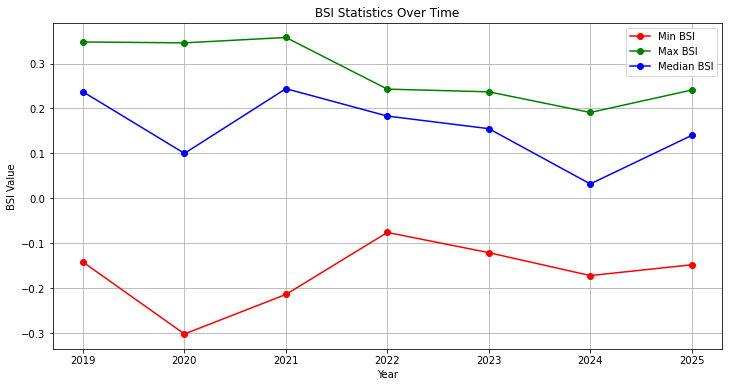

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
file_path = r"C:\Users\user\Downloads\bsi.csv"
bsi_data = pd.read_csv(file_path)
bsi_data.head()

# Clean the 'year' column
bsi_data['year'] = bsi_data['year'].str.replace(',', '').astype(int)

# Plotting the BSI statistics over the years
plt.figure(figsize=(12, 6))

# Line plots
plt.plot(bsi_data['year'], bsi_data['min_BSI'], marker='o', label='Min BSI', color='red')
plt.plot(bsi_data['year'], bsi_data['max_BSI'], marker='o', label='Max BSI', color='green')
plt.plot(bsi_data['year'], bsi_data['median_BSI'], marker='o', label='Median BSI', color='blue')

# Adding titles and labels
plt.title('BSI Statistics Over Time')
plt.xlabel('Year')
plt.ylabel('BSI Value')
plt.legend()
plt.grid(True)
plt.xticks(bsi_data['year'])  # Display all years on the x-axis

# Show the plot
plt.show()


6. Visualizing the Indices

7. Exporting the Indices

8. Conclusion

This workflow enables automated extraction of ecosystem indices from Sentinel-2 for protected areas. The results can be used for monitoring vegetation health, detecting water bodies, and assessing soil exposure over time and ready for modelling.